Primeiro trabalho prático de Computação Gráfica 2025.1|C209-L1
Lilyan Oliveira - 301|GES - Segunda versão

Descrição do projeto:
•	Analisem cuidadosamente as características visuais das imagens fornecidas. Os aluno devem utilizar as técnicas aprendidas em sala para operar as imagem fornecidas NESTA ESPECÍFICA ORDEM:
1.	Juntar todas as imagens em uma única
2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra)
3.	Aplicar o espelhamento
4.	Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).
5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)
6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)
•	Os itens devem ser resolvidos usando o resultado do anterior, por exemplo: a imagem resultado do item deve ser usada como base para o item 2.
•	Elaborem um plano detalhado descrevendo as etapas e técnicas que serão utilizadas para transformar a imagem inicial na imagem final. Considerem os conceitos e técnicas discutidos em sala de aula.


In [7]:
#PIL - utilizada para operações básicas em imagens
from PIL import Image

#Matplotlib - utilizada para exibir imagens e gráficos
import matplotlib.pyplot as plt

1.	Juntar todas as imagens em uma única

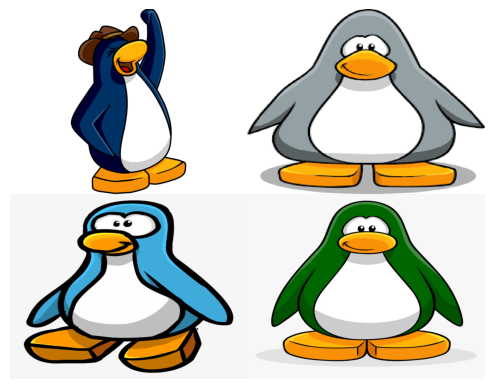

In [14]:
#Carregando as imagens
img1 = Image.open('P1.png')
img2 = Image.open('P2.png')
img3 = Image.open('P3.jpg')
img4 = Image.open('P4.png')

#Deixando as fotos do mesmo tamanho da foto 1 para facilitar as manipulaçòes
size = (img1.width, img1.height)
img2 = img2.resize(size)
img3 = img3.resize(size)
img4 = img4.resize(size)

#Agrupando de maneira horizontal
linha1 = Image.new('RGB', (img1.width * 2, img1.height))
linha1.paste(img1, (0, 0))
linha1.paste(img2, (img1.width, 0))

linha2 = Image.new('RGB', (img3.width * 2, img3.height))
linha2.paste(img3, (0, 0))
linha2.paste(img4, (img3.width, 0))

#Agrupando de maneira vertical
imagem_final = Image.new('RGB', (linha1.width, linha1.height * 2))
imagem_final.paste(linha1, (0, 0))
imagem_final.paste(linha2, (0, linha1.height))

# Mostrar imagem final
plt.imshow(imagem_final)
plt.axis('off')
plt.show()

# Salvar a imagem final
imagem_final.save('juntas.png')

2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra)

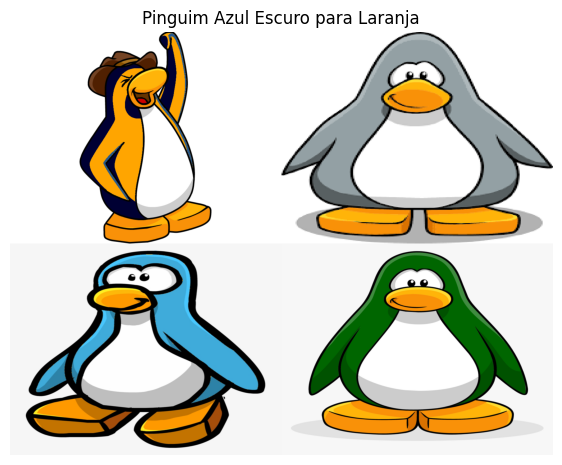

In [26]:
#Carregando imagem com os 4 pinguins
imagem = Image.open("juntas.png").convert("RGB")
img = np.array(imagem)

def trocar_azul_escuro_por_laranja(image: np.ndarray) -> np.ndarray:
    output = image.copy()

#Separando os canais
    r, g, b = output[:, :, 0], output[:, :, 1], output[:, :, 2]
#Alterando a cor
    mask_p1 = (r >= 0) & (r <= 30) & (g >= 30) & (g <= 70) & (b >= 80) & (b <= 130)
    output[mask_p1] = [255, 165, 0] 

    return output

imagem_laranja = trocar_azul_escuro_por_laranja(img)

plt.figure(figsize=(7, 7))
plt.imshow(imagem_laranja)
plt.axis('off')
plt.title("Pinguim Azul Escuro para Laranja")
plt.show()

#Salvando
Image.fromarray(imagem_laranja).save("laranja.png")


3.	Aplicar o espelhamento

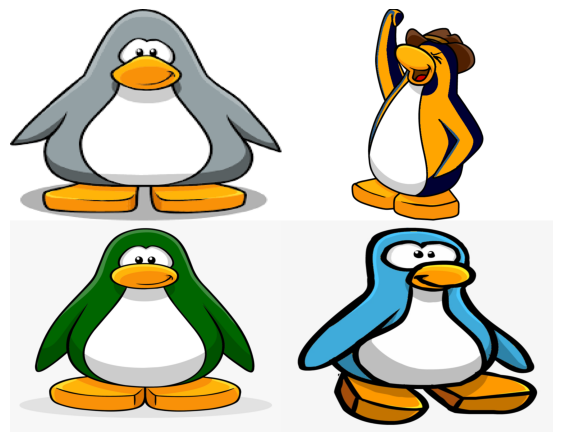

In [28]:
#Carregando imagem alterada para laranja o pinguim azul escuro
img = Image.open("laranja.png").convert("RGB")

#Convertendo pra array
img_array = np.array(img)

#Espelhando
img_espelhada = np.fliplr(img_array)

#Mostrando
plt.figure(figsize=(7, 7))
plt.imshow(img_espelhada)
plt.axis("off")
plt.show()

#Salvando
Image.fromarray(img_espelhada).save("espelhada.png")


4.	Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

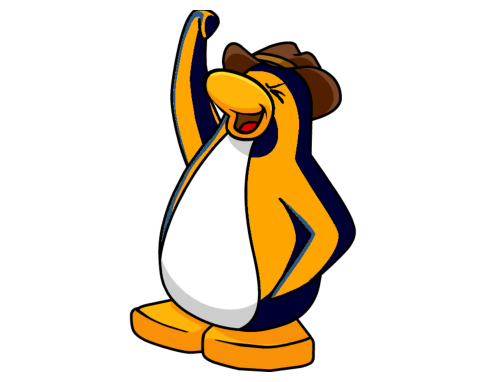

In [30]:
#Abrindo imagem espelhada
img = Image.open("espelhada.png").convert("RGB")
img_array = np.array(img)

#Cortando a imagem pela metade
altura, largura = img_array.shape[:2]
metade_altura = altura // 2
metade_largura = largura // 2

#Cortando quadrante superior direito
recorte = img_array[0:metade_altura, metade_largura:largura]

#Mostrando resultado
plt.figure(figsize=(6, 6))
plt.imshow(recorte)
plt.axis("off")
plt.show()

# Salvar imagem
Image.fromarray(recorte).save("pinguim_favorito.png")


5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)

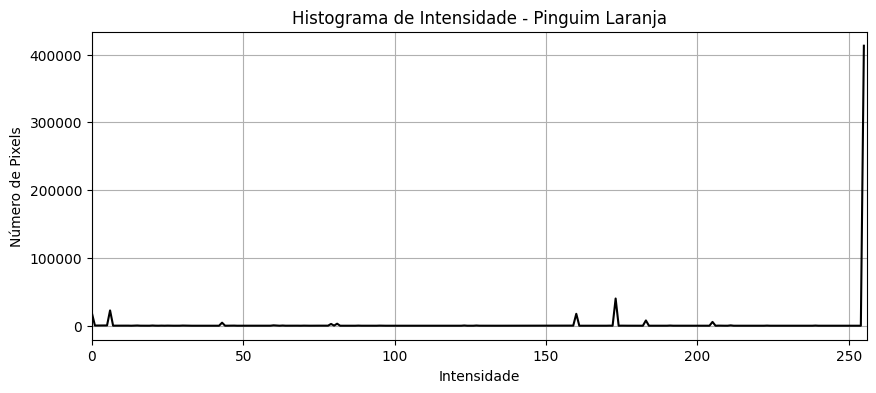

In [31]:
#Imagem recortada na grey scale
img = Image.open("pinguim_favorito.png").convert("L")
img_array = np.array(img)

#Histograma
hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

#Exibindo histograma
plt.figure(figsize=(10, 4))
plt.title("Histograma de Intensidade - Pinguim Laranja")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")
plt.plot(hist, color='black')
plt.grid()
plt.xlim([0, 256])
plt.show()


Escolhi o valor do limite 120 para estar entre dois picos diferentes no histograma (50–100 e 150–200). Isso permite segmentar a imagem separando bem as regiões mais escuras (como contornos e corpo) das mais claras (como a barriga), garantindo uma boa distinção visual.

6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)

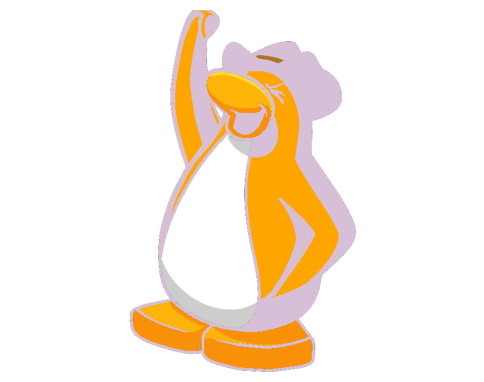

In [33]:
img_rgb = Image.open("pinguim_favorito.png").convert("RGB")
img_gray = img_rgb.convert("L")

#Convertendo para arrays NumPy
rgb_array = np.array(img_rgb)
gray_array = np.array(img_gray)

#Threshold
limiar = 120
mascara = gray_array < limiar  

lavanda = np.array([216, 191, 216], dtype=np.uint8)

#Aplicando a cor lavanda na máscara
resultado = rgb_array.copy()
resultado[mascara] = lavanda

plt.figure(figsize=(6, 6))
plt.imshow(resultado)
plt.axis("off")
plt.show()

Image.fromarray(resultado).save("threshold_lavanda.png")

Etapas e técnicas utilizadas

1. Junção das imagens
Foram utilizadas quatro imagens (P1, P2, P3 e P4), cada uma representando um pinguim com coloração e estilo distintos. As imagens foram redimensionadas proporcionalmente para a mesma altura e, em seguida, combinadas horizontalmente e verticalmente. O resultado foi uma única imagem contendo os quatro pinguins lado a lado.

2. Troca de cores
Foi criada uma função de mapeamento de cores utilizando máscaras RGB para identificar e alterar a cor do pinguim azul escuro (P1). A cor original foi substituída pela cor laranja, mantendo o restante da imagem inalterado. 

3. Espelhamento
A imagem resultante da etapa anterior foi espelhada horizontalmente com a função np.fliplr(), que inverte a ordem das colunas (left-to-right), criando um efeito de reflexo horizontal.

4. Recorte do pinguim favorito
A imagem espelhada foi dividida em quadrantes e o quadrante superior direito foi recortado, mantendo apenas o pinguim laranja. O recorte foi feito utilizando indexação em arrays NumPy, com base na altura e largura da imagem original.

5. Análise do histograma e escolha do limiar
O recorte do pinguim foi convertido para escala de cinza e seu histograma foi analisado com a biblioteca matplotlib. Foram identificadas duas regiões predominantes de intensidade: uma entre 50 e 100 (áreas mais escuras) e outra entre 150 e 200 (áreas mais claras).
Limiar escolhido: 120. O valor 120 foi escolhido por estar entre os dois picos, permitindo segmentar claramente as áreas escuras e claras da imagem.

6. Aplicação de cor personalizada
Utilizando uma máscara com base no limiar escolhido, todos os pixels com intensidade inferior a 120 foram coloridos com o tom lavanda. A substituição foi feita apenas nas regiões da máscara, preservando o restante da imagem original.
